In [1]:
from typing import NamedTuple, Any,Callable
from scipy.optimize import leastsq, curve_fit, least_squares, minimize, basinhopping
import numpy as np

import matplotlib.pyplot as plt

from __future__ import annotations

In [2]:
class SinParams(NamedTuple):
    amplitude: float = 1
    frequency: float = 1
    phase: float = 1
    offset: float = 1
    
    def __mul__(self, other: SinParams) -> SinParams:
        return SinParams(
                    amplitude=self.amplitude*other.amplitude,
                    frequency=self.frequency*other.frequency,
                    phase=self.phase*other.phase,
                    offset=self.offset*other.offset)
    

In [3]:
s = SinParams(1,2,3,4)

In [4]:
x = np.linspace(0, 10, 100)
y_data = 2*np.sin(2*x+np.pi/3)+np.random.random(len(x))

In [529]:
# "CG", "SLSQP", "BFGS"

In [530]:
def sin_func(x, params):
    return params[0]*np.sin(params[1]*x + params[2])

def chisq(func: Callable, x: np.ndarray, data: np.ndarray, params: Any) -> np.ndarray:
    return np.sum((func(x, params) - data)**2)


def sin_jac(x, params, data):
    return (
        np.sum(np.sin(params[1]*x + params[2])*(sin_func(x, params)-data)),
        np.sum(params[0]*np.cos(params[1]*x + params[2])*x*(sin_func(x, params)-data)), 
        np.sum(params[0]*np.cos(params[1]*x + params[2])*(sin_func(x, params)-data))
    )

def chisq_jac(jac: Callable, x: np.ndarray, data: np.ndarray, params: Any) -> np.ndarray:
    return jac(x, params, data)



[2.12402992 2.02484919 0.90030009]


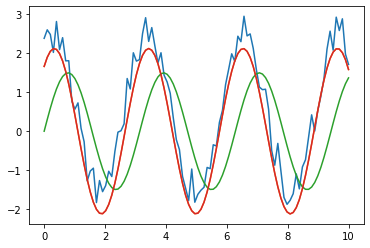

In [531]:
guess = [1.5, 2, 0]
method = ["CG", "SLSQP", "BFGS"][0]

fit = minimize(
        lambda params: chisq(sin_func, x, y_data, params), guess,
        jac = lambda params: chisq_jac(sin_jac, x, y_data, params),
        method=method).x

fit2 = minimize(
        lambda params: chisq(sin_func, x, y_data, params), guess,
        jac = "3-point",
        method=method).x

print(fit)
y_pred = sin_func(x, fit)
y_pred2 = sin_func(x, fit2)

y_guess = sin_func(x, guess)

plt.plot(x, y_data)
plt.plot(x, y_pred)
plt.plot(x, y_guess)
plt.plot(x, y_pred2)



In [412]:
lambda params: chisq_jac(sin_jac, x, y_data, params)

<function __main__.<lambda>(params)>

In [532]:
x = np.linspace(0, 10, 30)
y_data = 2*np.sin(2*x+np.pi/3)+(np.random.random(len(x))-.5)*4

[-2.14707318  2.03167547  3.82261833]
[-2.14707318  2.03167547  3.82261833]


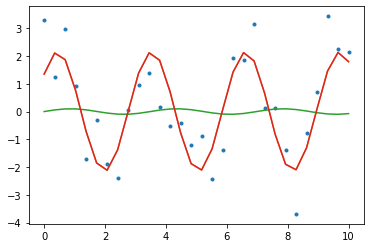

In [533]:
guess = [.1, 1.8, 0]

fit = basinhopping(
                func = lambda params: chisq(sin_func, x, y_data, params), 
                x0 = guess, 
                T = 1,
                # minimizer_kwargs={"jac": lambda params: chisq_jac(sin_jac, x, y_data, params)}
        ).x

fit2 = minimize(
        fun = lambda params: chisq(sin_func, x, y_data, params), 
        x0 = fit,
        # jac = lambda params: chisq_jac(sin_jac, x, y_data, params),   
        method=method).x

print(fit)
print(fit2)

y_pred = sin_func(x, fit)
y_pred2 = sin_func(x, fit2)

y_guess = sin_func(x, guess)

plt.plot(x, y_data, '.')
plt.plot(x, y_pred)
plt.plot(x, y_guess)
plt.plot(x, y_pred2)


In [370]:
def interpolate_on_regular_grid(x, y):
    x_inter = np.arange(np.min(x), np.max(x), np.min(np.diff(x)))
    return x_inter, np.interp(x_inter, x, y)

def guess_sin_freq(x, y):
    x_interp, y_interp = interpolate_on_regular_grid(x, y)
    fft = np.fft.fft(y_interp)
    freqs = np.fft.fftfreq(len(x_interp), d=x_interp[1]-x_interp[0])
    return 2*np.pi*freqs[1+np.argmax(fft[1:len(fft)//2])] # cuttoff zero element (i.e. the offset) and take only positive freqs

In [487]:
guess_sin_freq(x, y_data)

1.822123739082088

In [365]:
x = np.linspace(0, 100, 101)
y_data = np.sin(2*x)

/Users/4cd87a/opt/anaconda3/envs/phd_mask/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 5.0)

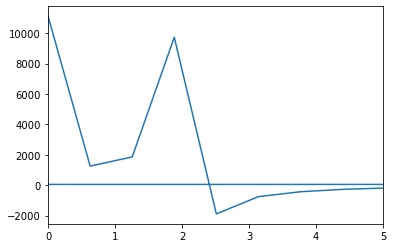

In [473]:
fft = np.fft.fft(y_data)
freqs = np.fft.fftfreq(len(x), d=x[1]-x[0])*(2*np.pi)
plt.plot(freqs, fft)
plt.xlim(0, 5)

In [488]:
a = list(SinParams())

In [501]:
def sin_func(params: SinParams, x: np.ndarray) -> np.ndarray:
    return params.amplitude*np.sin(params.frequency*x + params.phase) + params.offset

In [502]:
def sin_func2(x: np.ndarray, amplitude, frequency, phase, offset) -> np.ndarray:
    return amplitude*np.sin(frequency*x + phase) + offset

In [508]:
%timeit sin_func2(x, *SinParams(*a))

5.12 µs ± 47.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [507]:
%timeit sin_func2(x, amplitude=1, frequency=2, phase=1, offset=1)

4.65 µs ± 28.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [516]:
class Sin(object):
    def __init__(self):
        pass

In [517]:
type(Sin)

type

In [515]:
Sin()

In [519]:
from ..SciFit.fit_utils import to_minimize

ImportError: attempted relative import with no known parent package